# Confound analysis of QWERTY effect for YouTube video titles

ETH and QCRI dataset: https://storage.sg.ethz.ch/users/aabisheva/2013_YouTube_Twitter_ETH_QCRI/index.html
- Who Watches (and Shares) What on YouTube? And When? Using Twitter to Understand YouTube Viewership. Adiya Abisheva, Venkata Rama Kiran Garimella, David Garcia, Ingmar Weber. In Proceedings of the International Conference on Web Search and Data Mining (2014), pp. 593–602.

In [1]:
require(xtable,quietly = T)
source("DecodingFunctions.R")
options(warn=-1)

In [2]:
dsname <- "YouTube"
msg <- "YouTube videos"
load("YouTube/df1.RData")
load("YouTube/df2.RData")
load("YouTube/df3.RData")
load("YouTube/df4.RData")
df <- rbind(df1,df2,df3,df4)

In [3]:
lingdf <- lingControls(df, nbins=10)
save(lingdf, file="YouTube-rundata/lingControls.RData")

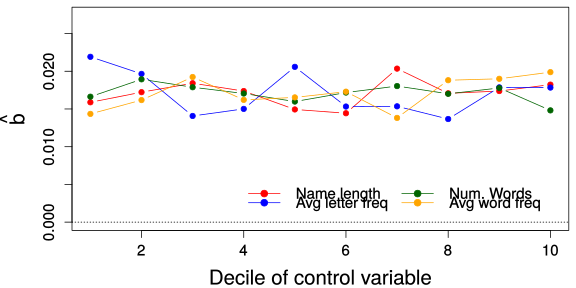

In [8]:
load("YouTube-rundata/lingControls.RData")  #lingdf

options(repr.plot.width=8, repr.plot.height=4)
options(jupyter.plot_mimetypes = 'image/svg+xml')
par(mar=c(4,5,0.5,0.5))

f <-lingdf$ctype=="nameLen"
mids <- lingdf$mid[f]; ests <- lingdf$est[f];
plot(mids, ests, col="red", type="b", xlab="Decile of control variable", ylab=expression(hat(b)), cex.lab=1.7, pch=19, ylim=c(min(c(0,lingdf$est)), max(lingdf$est)*1.25), cex.axis=1.25)

f <-lingdf$ctype=="avgLetterFreq"
mids <- lingdf$mid[f]; ests <- lingdf$est[f];
lines(mids, ests, col="blue", type="b", pch=19)

f <-lingdf$ctype=="nwords"
mids <- lingdf$mid[f]; ests <- lingdf$est[f];
lines(mids, ests, col="darkgreen", type="b", pch=19)

f <-lingdf$ctype=="avgWordFreq"
mids <- lingdf$mid[f]; ests <- lingdf$est[f];
lines(mids, ests, col="orange", type="b", pch=19)

legend(x=4, y=0.005, legend=c("Name length","Avg letter freq"), col=c("red", "blue"), pch=19, lwd=1, box.lwd=-1, cex=1.25)
legend(x=7, y=0.005, legend=c("Num. Words","Avg word freq"), col=c("darkgreen", "orange"), pch=19, lwd=1, box.lwd=-1, cex=1.25)

abline(h=0, lty=3)

In [5]:
strat <- Stratify(df, df$nR, nbins=10)
strat <- cbind(data.frame(ctype=rep("nR", 10)), strat)

stratpre <- Stratify(df, df$views, nbins=10)
stratpre <- cbind(data.frame(ctype=rep("views", 10)), stratpre)
strat <- rbind(strat, stratpre)

stratpre <- Stratify(df, df$comments, nbins=10)
stratpre <- cbind(data.frame(ctype=rep("comments", 10)), stratpre)
strat <- rbind(strat, stratpre)

stratpre <- Stratify(df, df$ts, nbins=10)
stratpre <- cbind(data.frame(ctype=rep("ts", 10)), stratpre)
strat <- rbind(strat, stratpre)

save(strat, file="YouTube-rundata/OtherControls.RData")

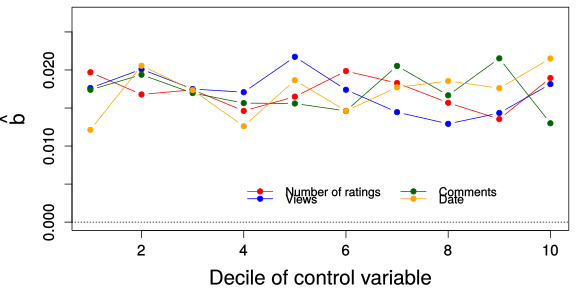

In [9]:
par(mar=c(4,5,0.5,0.5))

options(repr.plot.width=8, repr.plot.height=4)
options(jupyter.plot_mimetypes = 'image/svg+xml')
load("YouTube-rundata/OtherControls.RData")  #strat

f <-strat$ctype=="nR"
mids <- strat$mid[f]; ests <- strat$est[f];
plot(mids, ests, col="red", type="b", xlab="Decile of control variable", ylab=expression(hat(b)), cex.lab=1.7, pch=19, ylim=c(min(c(0,strat$est)), max(strat$est)*1.25), cex.axis=1.25)

f <-strat$ctype=="views"
mids <- strat$mid[f]; ests <- strat$est[f];
lines(mids, ests, col="blue", type="b", pch=19)

f <-strat$ctype=="comments"
mids <- strat$mid[f]; ests <- strat$est[f];
lines(mids, ests, col="darkgreen", type="b", pch=19)

f <-strat$ctype=="ts"
mids <- strat$mid[f]; ests <- strat$est[f];
lines(mids, ests, col="orange", type="b", pch=19)

legend(x=4, y=0.005, legend=c("Number of ratings","Views"), col=c("red", "blue"), pch=19, lwd=1, box.lwd=-1)
legend(x=7, y=0.005, legend=c("Comments", "Date"), col=c("darkgreen", "orange"), pch=19, lwd=1, box.lwd=-1)
abline(h=0, lty=3)
